In [2]:
# Load Packages + Data

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sb
import math

tb = pd.read_csv("/Users/jacobrose/Documents/BA222/Team Standard Batting New.csv")
tb.head()

,Tm,Year,W,L,W-L%,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,2021,52,110,0.321,6144,5489,679,1297,308,...,0.382,0.692,87,2099,99,54,32,28,24,1131
1,Atlanta Braves,2021,88,73,0.547,6056,5363,790,1307,269,...,0.435,0.754,96,2333,81,67,32,43,36,1054
2,Baltimore Orioles,2021,52,110,0.321,5983,5420,659,1296,266,...,0.402,0.705,90,2177,105,65,14,31,12,1033
3,Boston Red Sox,2021,92,70,0.568,6122,5495,829,1434,330,...,0.449,0.777,104,2467,100,61,10,42,22,1071
4,Chicago Cubs,2021,71,91,0.438,5972,5306,705,1255,225,...,0.407,0.719,93,2162,133,92,40,30,17,1001


In [6]:
# Descriptive Statistics

tb[["OPS+","TB","GDP","HBP","SH","SF","IBB","LOB"]].describe()

,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,97.166667,2115.873333,112.340000,55.123333,32.820000,37.543333,28.326667,1027.453333
std,8.871371,459.444063,28.360986,17.596028,19.215055,11.040884,13.068636,217.750205
min,73.000000,650.000000,28.000000,10.000000,0.000000,7.000000,1.000000,333.000000
25%,91.000000,2103.750000,104.000000,43.000000,18.000000,33.000000,19.000000,1049.000000
50%,97.000000,2221.500000,117.000000,54.000000,32.000000,38.500000,29.000000,1088.500000
75%,102.250000,2345.250000,131.000000,66.000000,46.250000,44.000000,37.250000,1128.000000
max,123.000000,2832.000000,160.000000,105.000000,85.000000,64.000000,67.000000,1250.000000


In [24]:
# Correlation Matrix

tba = pd.get_dummies(tb, drop_first = True)
corrMatrix = tb.corr()[["W-L%","OBP"]]
# corrMatrix = tb.corr()[["W-L%"]]
corrMatrix

corrMatrix["product"] = abs(corrMatrix["W-L%"] * corrMatrix["OBP"])
corrMatrix.sort_values("product", ascending = False) # SORTING VALUES
# corrMatrix.sort_values("W-L%", ascending = False) # SORTING VALUES

,W-L%,OBP,product
W-L%,1.000000,0.566623,0.566623
OBP,0.566623,1.000000,0.566623
OPS+,0.586186,0.781706,0.458225
OPS,0.522053,0.875668,0.457145
SLG,0.460939,0.751702,0.346489
L,-0.593611,-0.394805,0.234360
BA,0.280768,0.718734,0.201798
W,0.595408,0.288206,0.171600
RBI,0.274393,0.329454,0.090400
R,0.270729,0.322589,0.087334


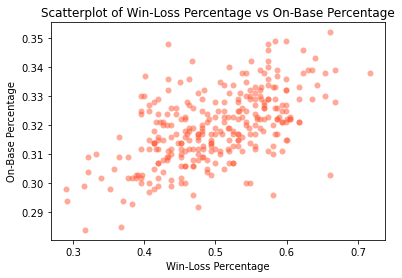

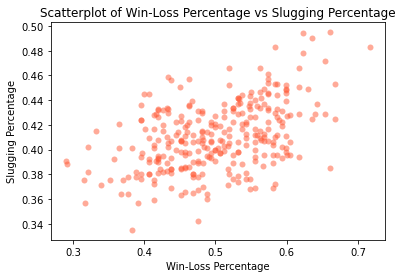

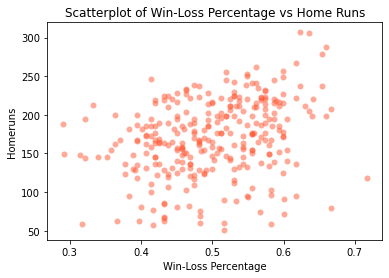

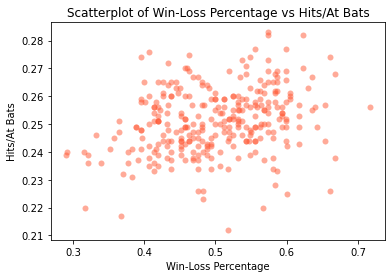

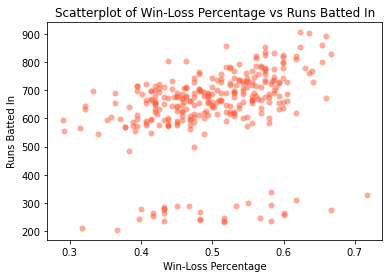

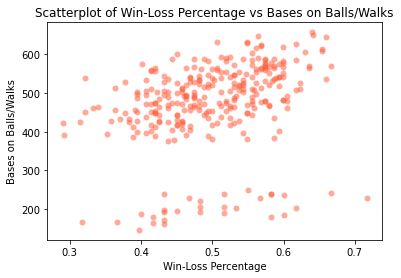

In [25]:
# Summary Graphs

plt.scatter(tb["W-L%"], tb["OBP"], alpha = 0.5, linewidths = 0, c = "#FF5733")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("On-Base Percentage")
plt.title("Scatterplot of Win-Loss Percentage vs On-Base Percentage")
plt.show()

plt.scatter(tb["W-L%"], tb["SLG"], alpha = 0.5, linewidths = 0, c = "#FF5733")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Slugging Percentage")
plt.title("Scatterplot of Win-Loss Percentage vs Slugging Percentage")
plt.show()

plt.scatter(tb["W-L%"], tb["HR"], alpha = 0.5, linewidths = 0, c = "#FF5733")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Homeruns")
plt.title("Scatterplot of Win-Loss Percentage vs Home Runs")
plt.show()

plt.scatter(tb["W-L%"], tb["BA"], alpha = 0.5, linewidths = 0, c = "#FF5733")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Hits/At Bats")
plt.title("Scatterplot of Win-Loss Percentage vs Hits/At Bats")
plt.show()

plt.scatter(tb["W-L%"], tb["RBI"], alpha = 0.5, linewidths = 0, c = "#FF5733")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Runs Batted In")
plt.title("Scatterplot of Win-Loss Percentage vs Runs Batted In")
plt.show()

plt.scatter(tb["W-L%"], tb["BB"], alpha = 0.5, linewidths = 0, c = "#FF5733")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Bases on Balls/Walks")
plt.title("Scatterplot of Win-Loss Percentage vs Bases on Balls/Walks")
plt.show()

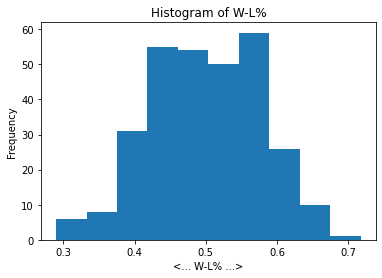

In [27]:
tb[["W-L%"]].plot.hist(title='Histogram of W-L%', legend=False)

plt.xlabel('<... W-L% ...>')
plt.ylabel('Frequency')
plt.savefig('saved.jpeg')